In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [54]:
df = pd.read_csv("../data/processed/resumes_raw.csv")


In [55]:
df.head()

,resume_text,category,file_name
0,Name: Ravali P ...,Internship Resumes,Internship_Ravali_Musquare Technologies (1).docx
1,SUSOVAN BAG Seeking a challenging po...,Internship Resumes,Internship_Susovan Bag_Musquare Technologies.docx
2,Anubhav Kumar Singh\t\t To work in a glob...,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
3,Murali Experience Summary I have 6 years of...,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,PROFILE SUMMARY I have overall ...,Peoplesoft resumes,Peoplesoft Admin_SirazuddinMohammad.docx


In [56]:
df.shape

(53, 3)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  53 non-null     object
 1   category     53 non-null     object
 2   file_name    53 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [58]:
df.isnull().sum()


resume_text    0
category       0
file_name      0
dtype: int64

In [59]:
df["category"].value_counts()


category
SQL Developer Lightning insight    11
workday resumes                    11
Reactjs Resumes                    10
Peoplesoft resumes                 10
React Resumes                       9
Internship Resumes                  2
Name: count, dtype: int64

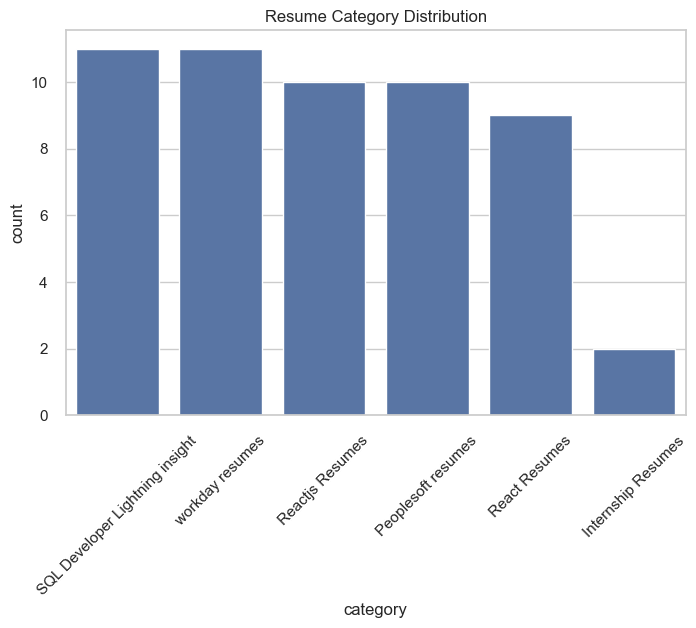

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Resume Category Distribution")
plt.show()


In [61]:
df["char_length"] = df["resume_text"].apply(len)

df["char_length"].describe()


count       53.000000
mean      4010.792453
std       2382.427474
min        994.000000
25%       2619.000000
50%       3633.000000
75%       5089.000000
max      15339.000000
Name: char_length, dtype: float64

In [62]:
df["word_count"] = df["resume_text"].apply(lambda x: len(x.split()))

df["word_count"].describe()


count      53.000000
mean      539.811321
std       326.819702
min       133.000000
25%       339.000000
50%       505.000000
75%       630.000000
max      2038.000000
Name: word_count, dtype: float64

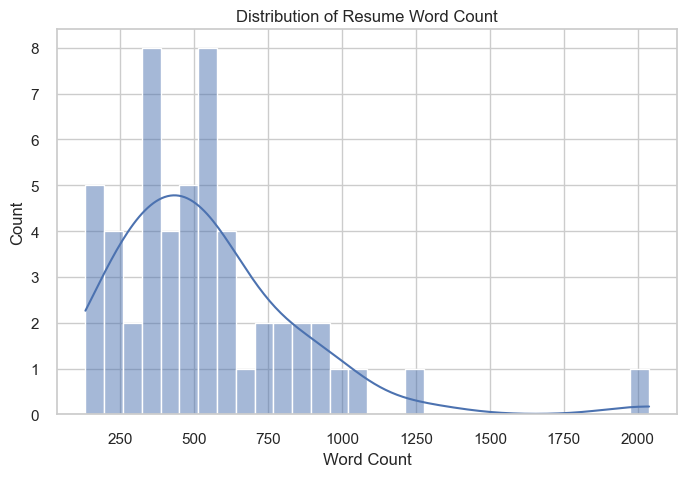

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Distribution of Resume Word Count")
plt.xlabel("Word Count")
plt.show()


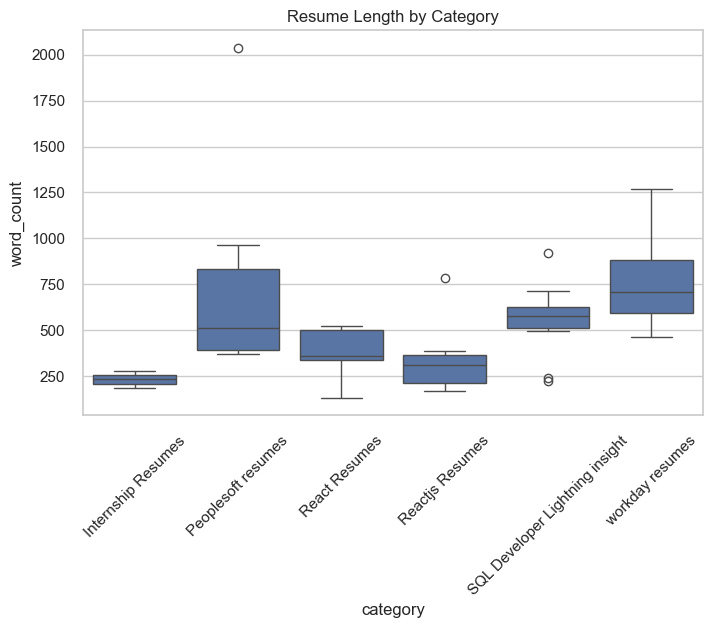

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="category", y="word_count")
plt.xticks(rotation=45)
plt.title("Resume Length by Category")
plt.show()


In [65]:
from collections import Counter

all_words = " ".join(df["resume_text"]).lower().split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[('and', 1395),
 ('the', 763),
 ('in', 701),
 ('to', 615),
 ('of', 508),
 ('for', 359),
 ('on', 357),
 ('experience', 293),
 (':', 278),
 ('using', 244),
 ('with', 227),
 ('as', 220),
 ('workday', 181),
 ('from', 174),
 ('a', 173),
 ('application', 162),
 ('data', 156),
 ('business', 146),
 ('sql', 138),
 ('peoplesoft', 135)]

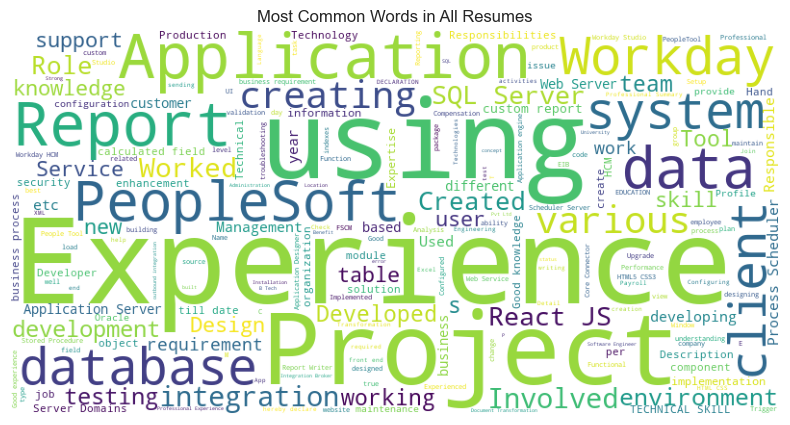

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df["resume_text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in All Resumes")

plt.savefig("../visuals/wordcloud_all_resumes.png", bbox_inches="tight")
plt.show()


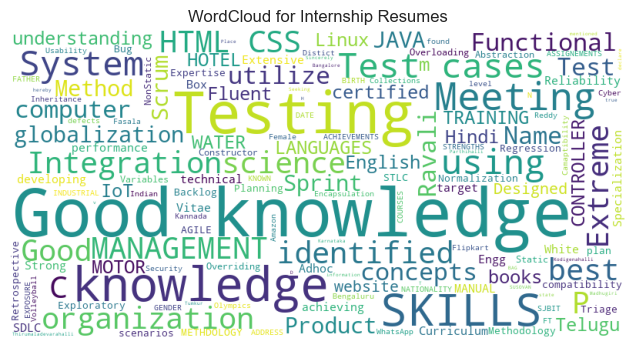

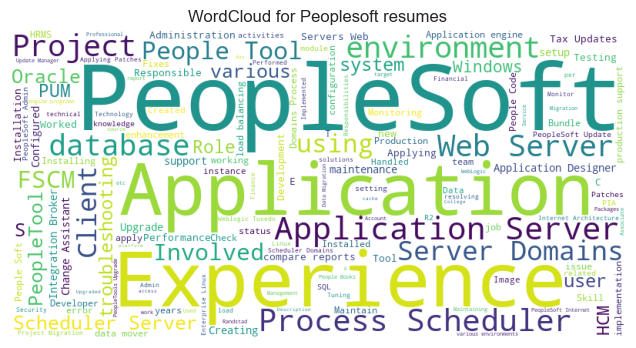

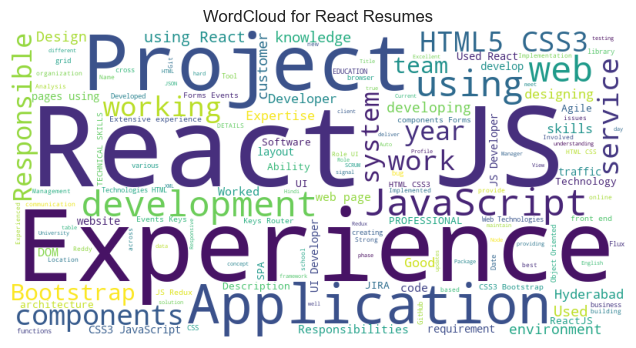

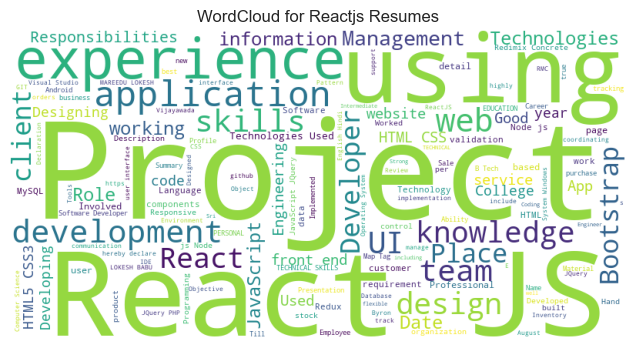

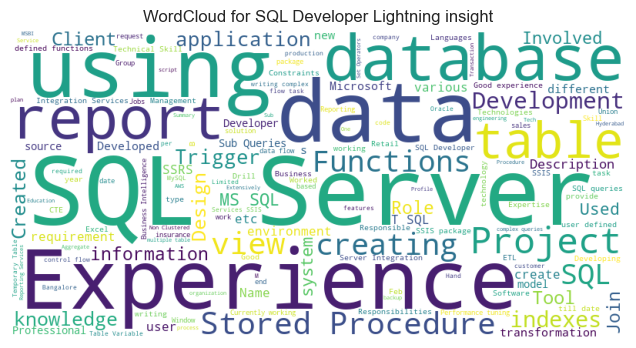

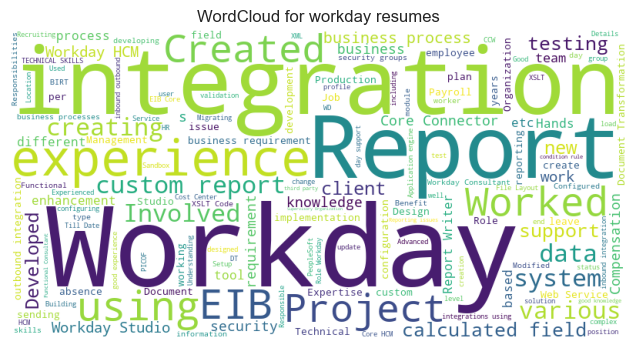

In [67]:
for cat in df["category"].unique():
    text = " ".join(df[df["category"] == cat]["resume_text"])

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=150
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"WordCloud for {cat}")

    filename = f"wordcloud_{cat.replace(' ', '_')}.png"
    plt.savefig(f"../visuals/{filename}", bbox_inches="tight")
    plt.show()


In [68]:
df["file_type"] = df["file_name"].apply(lambda x: x.split(".")[-1].lower())


In [69]:
df["file_type"].value_counts()


file_type
docx    52
pdf      1
Name: count, dtype: int64

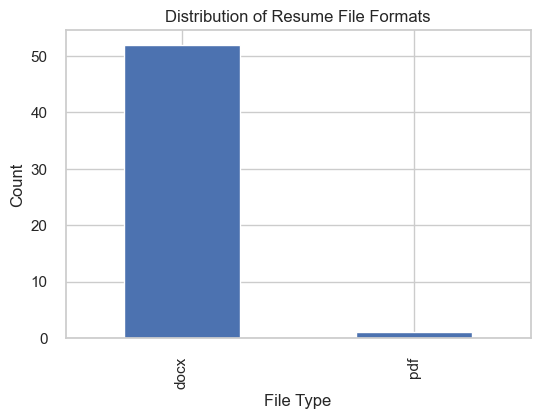

In [70]:
plt.figure(figsize=(6,4))
df["file_type"].value_counts().plot(kind="bar")
plt.title("Distribution of Resume File Formats")
plt.xlabel("File Type")
plt.ylabel("Count")

plt.savefig("../visuals/resume_file_type_distribution.png", bbox_inches="tight")
plt.show()


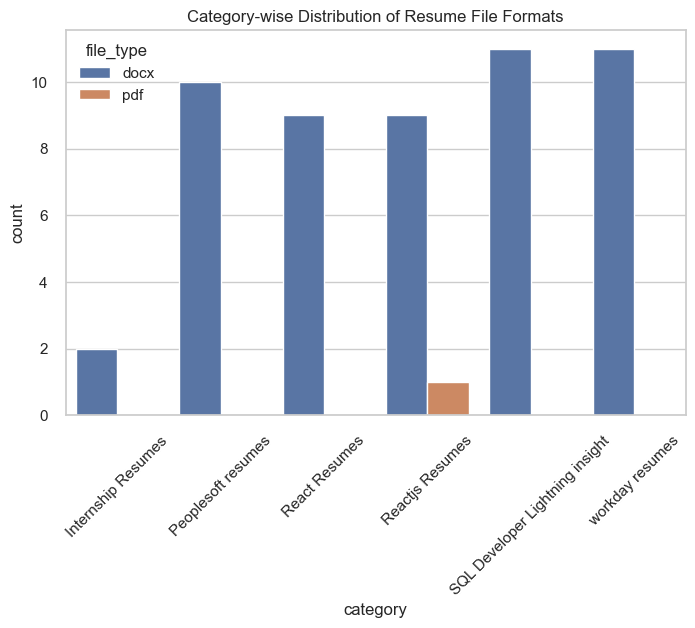

In [71]:
plt.figure(figsize=(8,5))
import seaborn as sns

sns.countplot(data=df, x="category", hue="file_type")
plt.xticks(rotation=45)
plt.title("Category-wise Distribution of Resume File Formats")

plt.savefig("../visuals/category_vs_filetype.png", bbox_inches="tight")
plt.show()
